Visualizing Likelihood Masks (Grayscale with Clipping)
Image Dimensions: 384x384
Pixel Scale: 30 m/pixel
Clipping colormap maximum at likelihood = 0.1


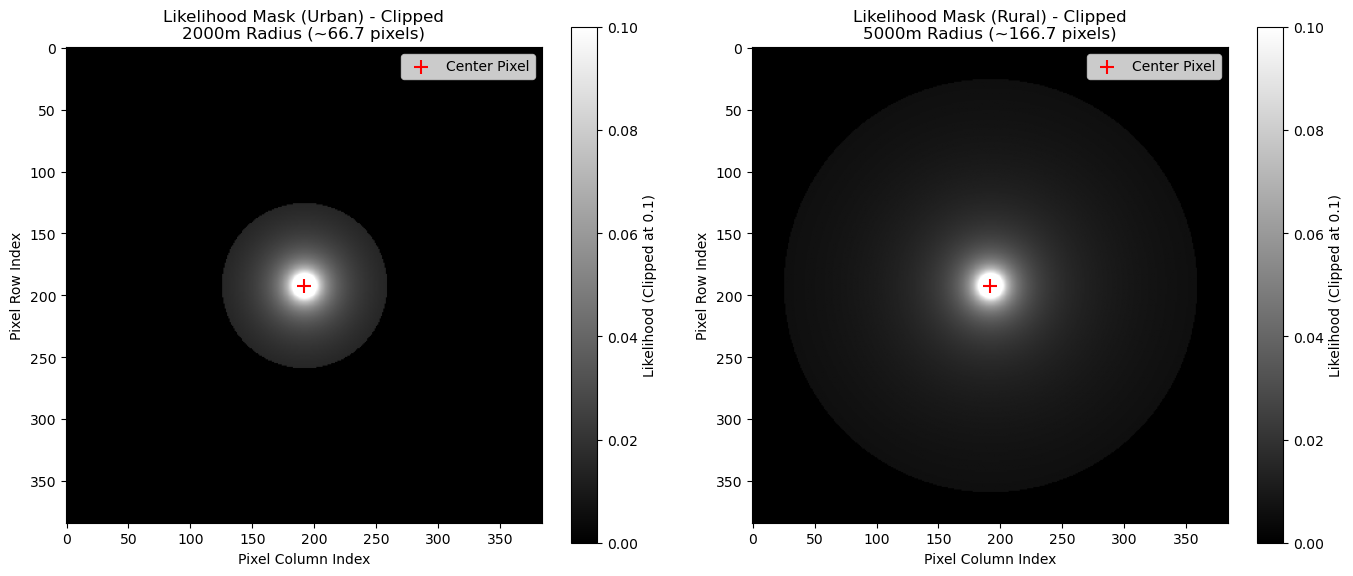


Visualization complete.

--- Alternative Visualization: Log(Distance) ---


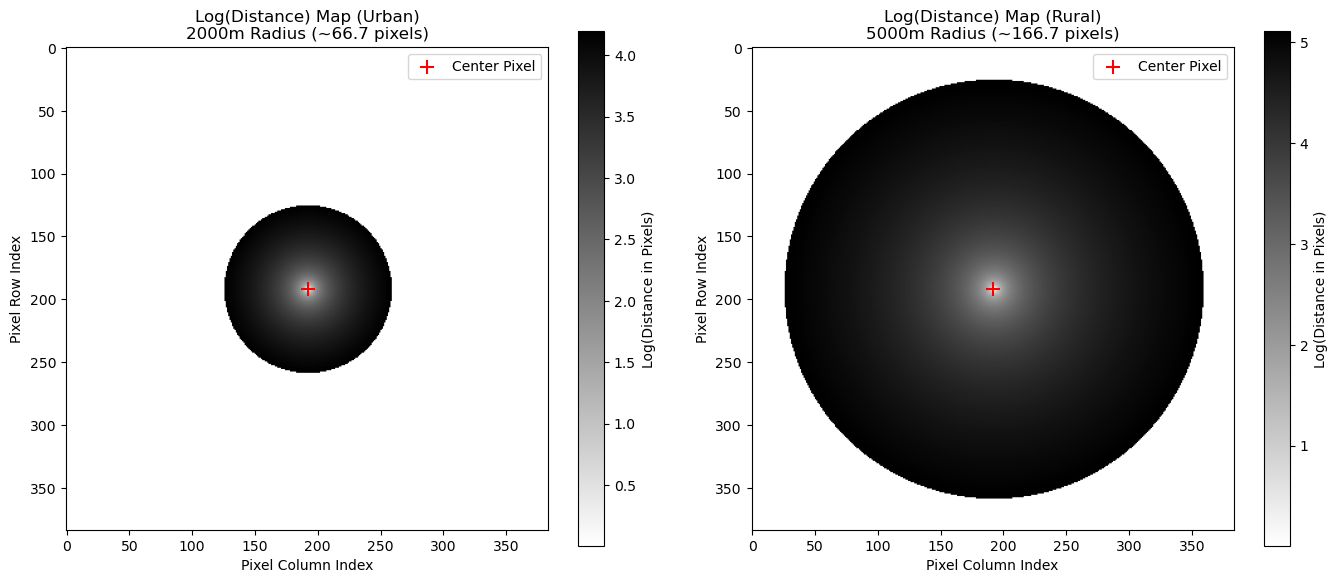

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Configuration ---
IMG_HEIGHT = 384
IMG_WIDTH = 384
PIXEL_SCALE = 30
RADIUS_METERS_URBAN = 2000
RADIUS_METERS_RURAL = 5000

# --- Calculations ---
center_row = IMG_HEIGHT // 2
center_col = IMG_WIDTH // 2
y_coords, x_coords = np.ogrid[:IMG_HEIGHT, :IMG_WIDTH]
dist_from_center = np.sqrt((x_coords - center_col)**2 + (y_coords - center_row)**2)
dist_from_center[center_row, center_col] = 1.0 

# --- Function to create the likelihood map ---
def create_likelihood_map(dist_map, radius_meters, pixel_scale):
    radius_pixels = radius_meters / pixel_scale
    likelihood_map = np.zeros_like(dist_map, dtype=np.float32)
    mask_within_radius = dist_map <= radius_pixels
    likelihood_map[mask_within_radius] = 1.0 / dist_map[mask_within_radius]
    return likelihood_map, radius_pixels

# --- Generate the two likelihood maps ---
likelihood_map_urban, radius_pixels_urban = create_likelihood_map(
    dist_from_center, RADIUS_METERS_URBAN, PIXEL_SCALE
)
likelihood_map_rural, radius_pixels_rural = create_likelihood_map(
    dist_from_center, RADIUS_METERS_RURAL, PIXEL_SCALE
)

# --- Visualization ---

print(f"Visualizing Likelihood Masks (Grayscale with Clipping)")
print(f"Image Dimensions: {IMG_HEIGHT}x{IMG_WIDTH}")
print(f"Pixel Scale: {PIXEL_SCALE} m/pixel")

VMAX_CLIP = 0.1 

print(f"Clipping colormap maximum at likelihood = {VMAX_CLIP}")

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot Urban (2km) Likelihood Mask with Clipping
ax = axes[0]
# <<< --- Use vmin and vmax in imshow --- >>>
im = ax.imshow(likelihood_map_urban, cmap='gray', origin='upper',
               vmin=0, vmax=VMAX_CLIP)
ax.set_title(f'Likelihood Mask (Urban) - Clipped\n{RADIUS_METERS_URBAN}m Radius (~{radius_pixels_urban:.1f} pixels)')
ax.scatter(center_col, center_row, c='red', marker='+', s=100, label='Center Pixel')
ax.set_xlabel("Pixel Column Index")
ax.set_ylabel("Pixel Row Index")
ax.legend(loc='upper right')
fig.colorbar(im, ax=ax, label=f'Likelihood (Clipped at {VMAX_CLIP})', shrink=0.8)

# Plot Rural (5km) Likelihood Mask with Clipping
ax = axes[1]
im = ax.imshow(likelihood_map_rural, cmap='gray', origin='upper',
               vmin=0, vmax=VMAX_CLIP)
ax.set_title(f'Likelihood Mask (Rural) - Clipped\n{RADIUS_METERS_RURAL}m Radius (~{radius_pixels_rural:.1f} pixels)')
ax.scatter(center_col, center_row, c='red', marker='+', s=100, label='Center Pixel')
ax.set_xlabel("Pixel Column Index")
ax.set_ylabel("Pixel Row Index")
ax.legend(loc='upper right')
fig.colorbar(im, ax=ax, label=f'Likelihood (Clipped at {VMAX_CLIP})', shrink=0.8) 

plt.tight_layout(pad=2.0)
plt.show()

print("\nVisualization complete.")
print("\n--- Alternative Visualization: Log(Distance) ---")

def create_log_distance_map(dist_map, radius_meters, pixel_scale):
    radius_pixels = radius_meters / pixel_scale
    display_map = np.log(dist_map + 1e-9)
    display_map[dist_map > radius_pixels] = np.nan
    return display_map, radius_pixels

log_dist_map_urban, radius_pixels_urban_log = create_log_distance_map(
    dist_from_center, RADIUS_METERS_URBAN, PIXEL_SCALE)
log_dist_map_rural, radius_pixels_rural_log = create_log_distance_map(
    dist_from_center, RADIUS_METERS_RURAL, PIXEL_SCALE)

fig2, axes2 = plt.subplots(1, 2, figsize=(14, 7))

# Plot Urban Log(Distance)
ax = axes2[0]
# Log(1) = 0 near center -> dark, Log(large distance) -> bright
im = ax.imshow(log_dist_map_urban, cmap='gray_r', origin='upper') 
ax.set_title(f'Log(Distance) Map (Urban)\n{RADIUS_METERS_URBAN}m Radius (~{radius_pixels_urban_log:.1f} pixels)')
ax.scatter(center_col, center_row, c='red', marker='+', s=100, label='Center Pixel')
ax.set_xlabel("Pixel Column Index")
ax.set_ylabel("Pixel Row Index")
ax.legend(loc='upper right')
fig2.colorbar(im, ax=ax, label='Log(Distance in Pixels)', shrink=0.8)

# Plot Rural Log(Distance)
ax = axes2[1]
im = ax.imshow(log_dist_map_rural, cmap='gray_r', origin='upper')
ax.set_title(f'Log(Distance) Map (Rural)\n{RADIUS_METERS_RURAL}m Radius (~{radius_pixels_rural_log:.1f} pixels)')
ax.scatter(center_col, center_row, c='red', marker='+', s=100, label='Center Pixel')
ax.set_xlabel("Pixel Column Index")
ax.set_ylabel("Pixel Row Index")
ax.legend(loc='upper right')
fig2.colorbar(im, ax=ax, label='Log(Distance in Pixels)', shrink=0.8)

plt.tight_layout(pad=2.0)
plt.show()